<a href="https://colab.research.google.com/github/Lakshya937/AAIES/blob/main/AAIES7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The Problem Statement:

Implement a Python Code for the following problem:

A logistics company is trying to optimize their delivery routes. They have a dataset of historical delivery data, which includes the start and end points of each delivery, as well as the distance between each point. They want to use graph-based visualization and logical reasoning to identify the most efficient delivery routes between any two points when provided to the code.

The dataset is:




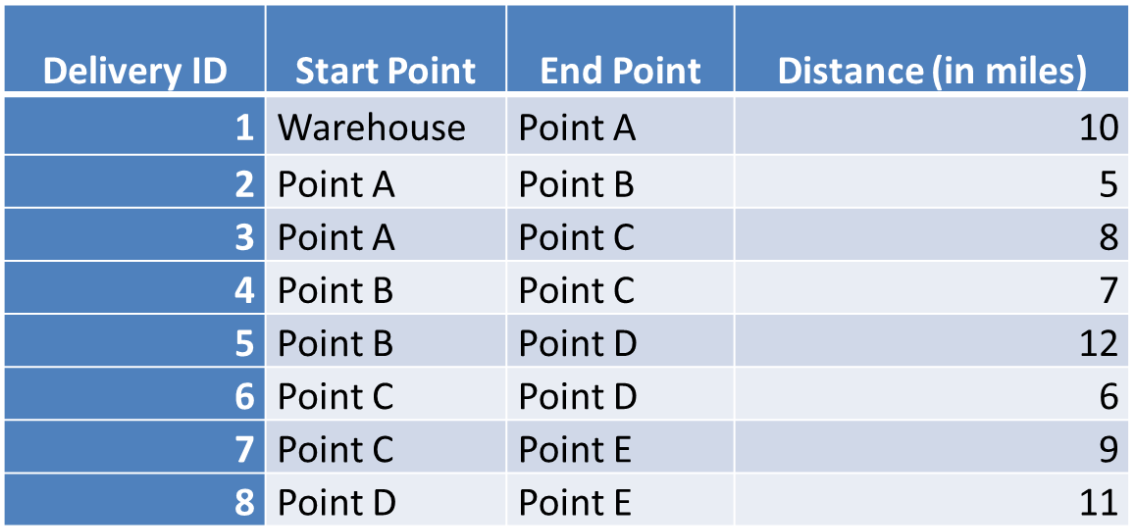

In [1]:
!pip install pyvis
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.8 MB/s eta 0:00:00


In [2]:
### To plot a networkx graph in pyvis
import networkx as nx
from pyvis.network import Network

In [3]:
# Step 1: Create a graph representation of delivery routes
# def create_delivery_graph(data):
#     # TODO: Implement this function to create a graph from the given delivery data using NetworkX
#     pass
def create_delivery_graph(data):
    G = nx.Graph()

    for delivery_id, source, destination, distance in data:
        G.add_edge(source, destination, distance=distance)

    return G

In [4]:
# Step 2: Visualize the graph using Pyvis
# def visualize_graph(G):
#     # TODO: Implement this function to visualize the graph using Pyvis
#     pass

def visualize_graph(G, save_path):
    nt = Network()

    for node in G.nodes():
        nt.add_node(node)

    for edge in G.edges(data=True):
        nt.add_edge(edge[0], edge[1], value=edge[2]['distance'])

    nt.save_graph(save_path)

In [5]:
# Step 3: Implement A* heuristic search algorithm
# def search(graph, start, end):
#     # TODO: Implement the A* heuristic search algorithm to find the shortest path
#     pass

def astar_search(graph, start, end):
    def heuristic(node):
        # A simple heuristic, you can customize this based on domain-specific knowledge
        return 0

    open_list = [(start, 0)]
    closed_list = set()
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes()}
    g_score[start] = 0

    while open_list:
        current, current_g_score = min(open_list, key=lambda x: x[1])

        if current == end:
            path = []
            while current in came_from:
                path.insert(0, current)
                current = came_from[current]
            return path, g_score[end]

        open_list.remove((current, current_g_score))
        closed_list.add(current)

        for neighbor in graph.neighbors(current):
            if neighbor in closed_list:
                continue

            tentative_g_score = g_score[current] + graph[current][neighbor]['distance']

            if neighbor not in [node[0] for node in open_list]:
                open_list.append((neighbor, tentative_g_score + heuristic(neighbor)))
            elif tentative_g_score >= g_score[neighbor]:
                continue

            came_from[neighbor] = current
            g_score[neighbor] = tentative_g_score

    return None, float('inf')